In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from word2number import w2n

In [2]:
df=pd.read_csv(r"C:\Users\sahua\OneDrive\Desktop\Data_science\Marketing_EDA\ifood_df.csv")

## Data Profiling

In [3]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
df.shape

(2205, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [6]:
df.describe(include='all')

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [7]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

## Data Cleaning

In [8]:
df.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [9]:
df_dup=df[df.duplicated()]
len(df_dup)

184

In [10]:
df.drop_duplicates(keep=False, inplace=True)
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0


In [11]:
#First, Change Column data type to string and then replace 1 with different number & 0 with blank.
df['marital_Married']=df['marital_Married'].astype(str).replace({'1':'5','0':''})
df['marital_Single']=df['marital_Single'].astype(str).replace({'1':'4','0':''})
df['marital_Together']=df['marital_Together'].astype(str).replace({'1':'3','0':''})
df['marital_Widow']=df['marital_Widow'].astype(str).replace({'1':'2','0':''})
df['marital_Divorced']=df['marital_Divorced'].astype(str).replace({'0':''})
#Now all columns contain different numbers for different marital status, lets join them in one column.
df['marital_status']=df["marital_Widow"]+df['marital_Together']+df['marital_Single']+df['marital_Married']+df['marital_Divorced']
#Next, we map numbers into different categorical values.
df['marital_status']=df['marital_status'].map({'1':'Divorced', '2':'Widow','3':'Together','4':'Single','5':'Married'})
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status
0,58138.0,0,0,58,635,88,546,172,88,88,...,,0,0,1,0,0,1529,1441,0,Single
1,46344.0,1,1,38,11,1,6,2,1,6,...,,0,0,1,0,0,21,15,0,Single
2,71613.0,0,0,26,426,49,127,111,21,42,...,,0,0,1,0,0,734,692,0,Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,,0,0,1,0,0,48,43,0,Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,,0,0,0,0,1,407,392,0,Married


In [12]:
df=df.drop(['marital_Married','marital_Single','marital_Together','marital_Widow','marital_Divorced'],axis='columns')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Customer_Days,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status
0,58138.0,0,0,58,635,88,546,172,88,88,...,2822,0,0,1,0,0,1529,1441,0,Single
1,46344.0,1,1,38,11,1,6,2,1,6,...,2272,0,0,1,0,0,21,15,0,Single
2,71613.0,0,0,26,426,49,127,111,21,42,...,2471,0,0,1,0,0,734,692,0,Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,2298,0,0,1,0,0,48,43,0,Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,2320,0,0,0,0,1,407,392,0,Married


In [13]:
df['education_2n Cycle']=df['education_2n Cycle'].astype(str).replace({'0':''})
df['education_Basic']=df['education_Basic'].astype(str).replace({'1':'2','0':''})
df['education_Graduation']=df['education_Graduation'].astype(str).replace({'1':'3','0':''})
df['education_Master']=df['education_Master'].astype(str).replace({'1':'4','0':''})
df['education_PhD']=df['education_PhD'].astype(str).replace({'1':'5','0':''})
df['education_level']=df['education_2n Cycle']+df['education_Basic']+df['education_Graduation']+df['education_Master']+df['education_PhD']
df['education_level']=df['education_level'].map({'1':'2n Cycle','2':'Basic','3':'Graduation','4':'Master','5':'PhD'})
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level
0,58138.0,0,0,58,635,88,546,172,88,88,...,,,3,,,1529,1441,0,Single,Graduation
1,46344.0,1,1,38,11,1,6,2,1,6,...,,,3,,,21,15,0,Single,Graduation
2,71613.0,0,0,26,426,49,127,111,21,42,...,,,3,,,734,692,0,Together,Graduation


In [14]:
df=df.drop(['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD'],axis='columns')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level
0,58138.0,0,0,58,635,88,546,172,88,88,...,3,11,1,63,2822,1529,1441,0,Single,Graduation
1,46344.0,1,1,38,11,1,6,2,1,6,...,3,11,0,66,2272,21,15,0,Single,Graduation
2,71613.0,0,0,26,426,49,127,111,21,42,...,3,11,0,55,2471,734,692,0,Together,Graduation
3,26646.0,1,0,26,11,4,20,10,3,5,...,3,11,0,36,2298,48,43,0,Together,Graduation
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,11,0,39,2320,407,392,0,Married,PhD


In [15]:
#for feature engineering, we join KidHome And TeenHome to find out number of children in a house
df['kids']=df['Kidhome']+df['Teenhome']
df=df.drop(['Kidhome','Teenhome'],axis=1)
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids
0,58138.0,58,635,88,546,172,88,88,3,8,...,11,1,63,2822,1529,1441,0,Single,Graduation,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,11,0,66,2272,21,15,0,Single,Graduation,2
2,71613.0,26,426,49,127,111,21,42,1,8,...,11,0,55,2471,734,692,0,Together,Graduation,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,11,0,36,2298,48,43,0,Together,Graduation,1
4,58293.0,94,173,43,118,46,27,15,5,5,...,11,0,39,2320,407,392,0,Married,PhD,1


## Exploratory data analysis

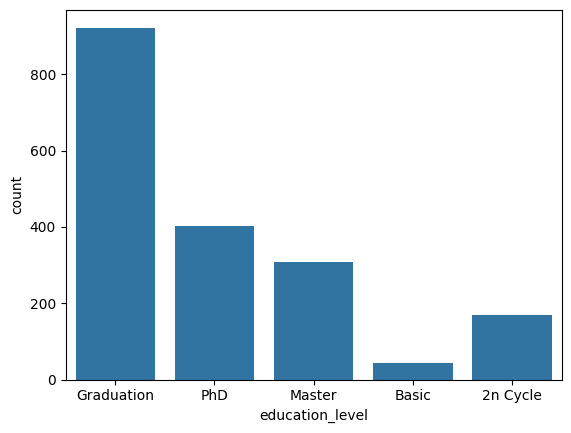

In [16]:
sns.countplot(x="education_level", data=df)
plt.show()

people are mainly graduated followed by PHD and Master degree thats is held by very less people in comparison to number of people who are graduated.

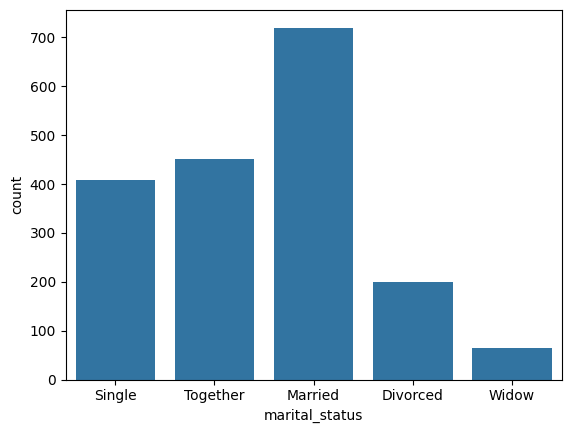

In [17]:
sns.countplot(x="marital_status", data=df)
plt.show()

Most of the people are Married followed by number of people who are Together and Single. There are very less people who are either divorced and widow in this dataset.

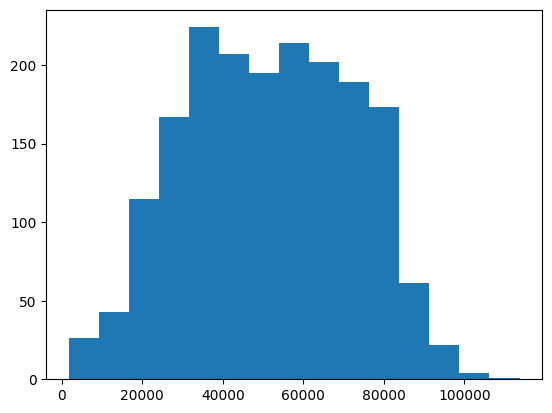

In [18]:
plt.hist(df["Income"], bins=15)
plt.show()

Histogram shows that most of people have income between 3000-8000. Next, we see Income distribution using box plot. Here, graph also shows if having more or less kids make any change in Income distribution. Using seaborn library, Box plot can be easily plotted.

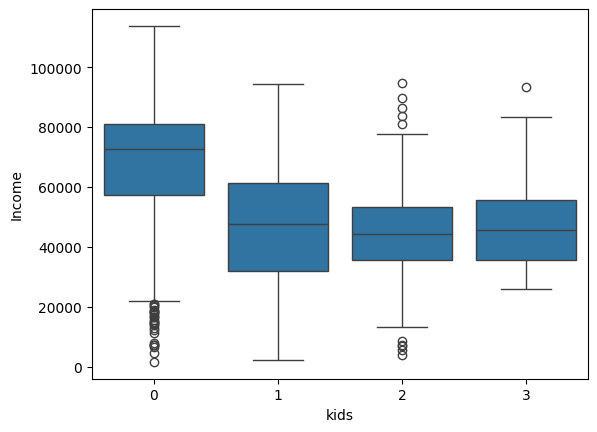

In [19]:
sns.boxplot(y=df["Income"], x=df["kids"])
plt.show()

People having no kid tend to have higher salaries then those having kids. Which is contradictory to general assumption that more kids would need more money and anyone would like to earn more 2) As there are more kids, people have less income.e.g. people having one kid tend to earn more then those who has 2 or 3 kid

Now lets explore Bivariate Analysis, which is used when we have to explore the relationship between 2 different variables (Correlation) and we have to do this because, in the end, our main task is to explore the relationship between variables to build a powerful model. And when we analyze more than 2 variables together then it is known as Multivariate Analysis. we will work on different plots for Bivariate as well on Multivariate Analysis

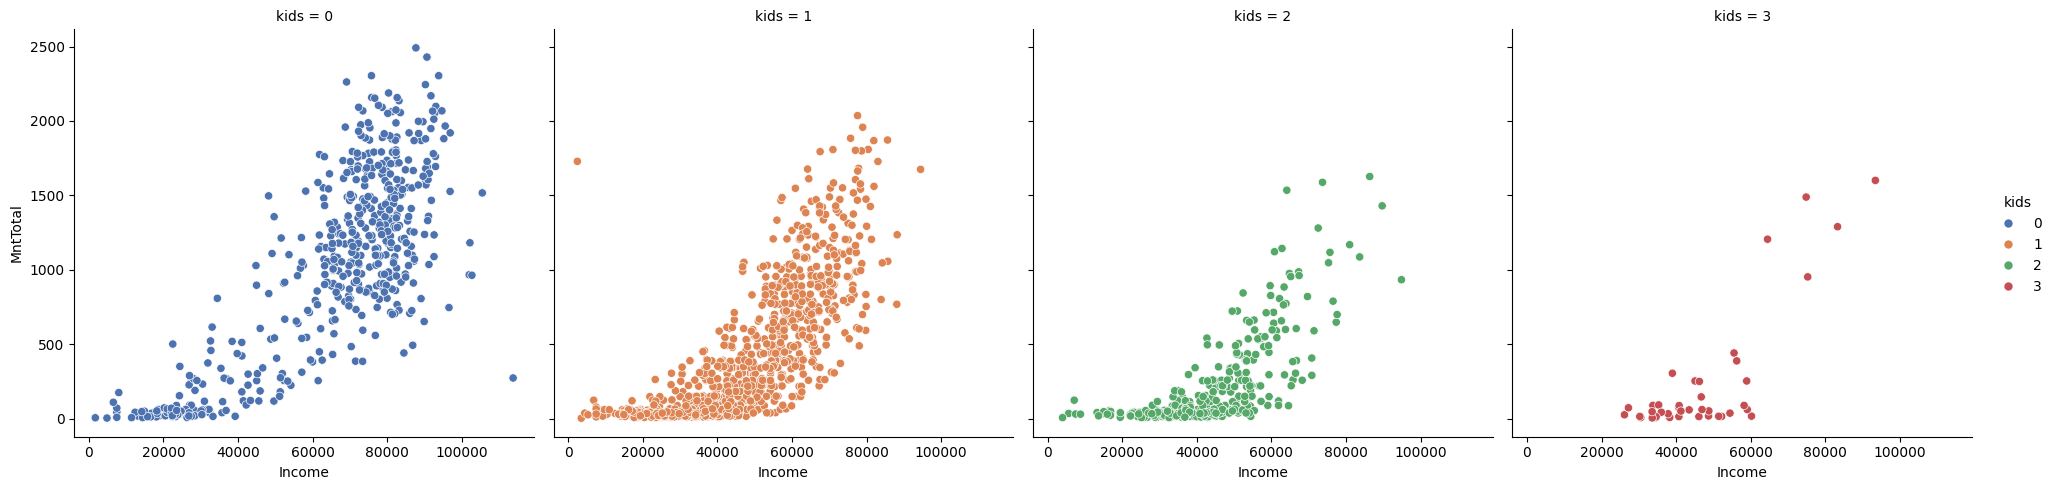

In [20]:
# i have used seaborn relplot to plot Income and MntTotal relationship using scatter plot. 
#As I also wanted to see if this relationship changes with number of kids at home, replots allow to make subplots of a graph.
sns.relplot(x="Income", y="MntTotal", data=df, col="kids",hue="kids", kind="scatter",palette="deep")
plt.show()

Here we see Income, total amount spent and number of kids are negatively correlated i.e. people are tend to earn more & spend a lot more when they don't have any kid. As they start having kids, expenses comes down. which makes sense. People having 3 kids, are spending way less than those having 0 or 1 kid.

In [ ]:
# Our dataset contains these expenses in different columns, first group the items by kids and sum expenses in different category.then restructure the data to have all expenses in one column
expenses=df.groupby(["kids"])["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts"].mean().unstack().reset_index(name="Total").rename(columns={'level_0': 'expense_type'})

#Here, i have used seaborn cat plot as i wanted to make subplots for number of kids.
chart=sns.catplot(data=expenses.sort_values(by="Total",ascending=False),x="expense_type",y="Total",kind="bar",legend=True, col="kids")
chart.set_xticklabels(rotation=90)
plt.plot()

here we see, everyone (with or w/o kid) tend to spend more on wine and meat products, in comparison to spending on fish, sweet, & fruits. So having a kid do not change priorities in terms of expense category. Also, as we saw before, people with 0 kid earn more, and they spend more. This also holds true in these graphs.

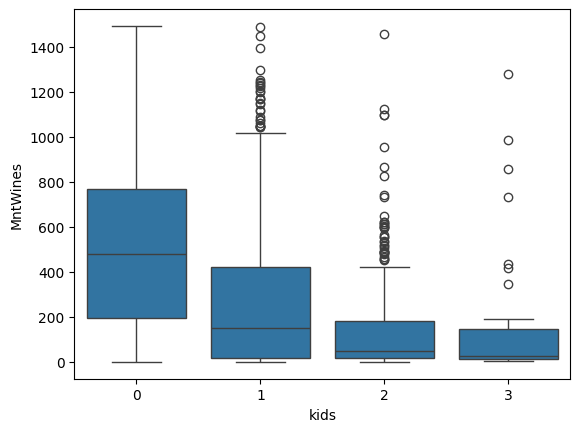

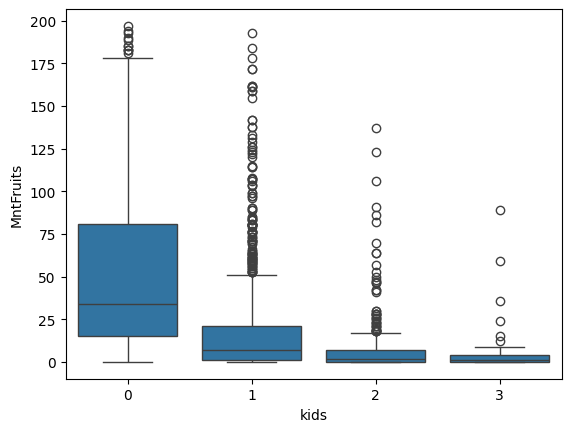

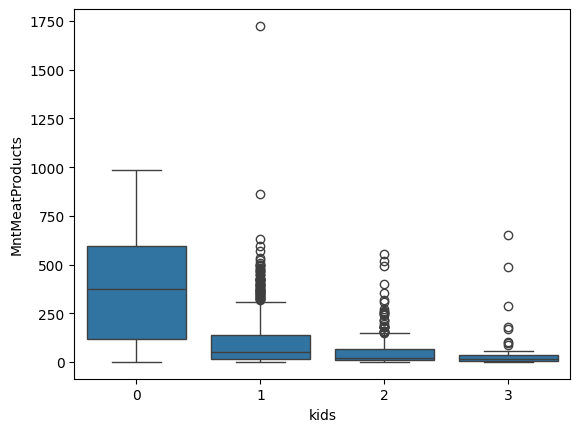

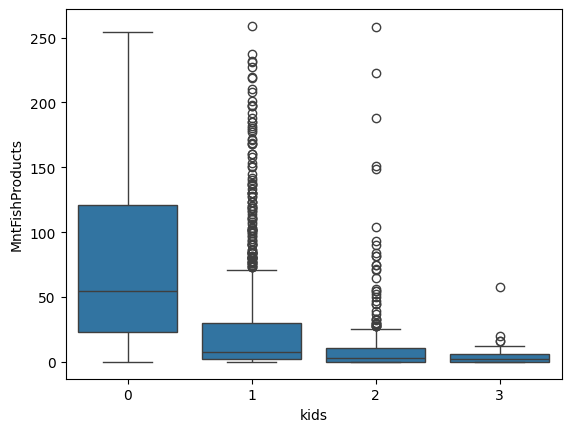

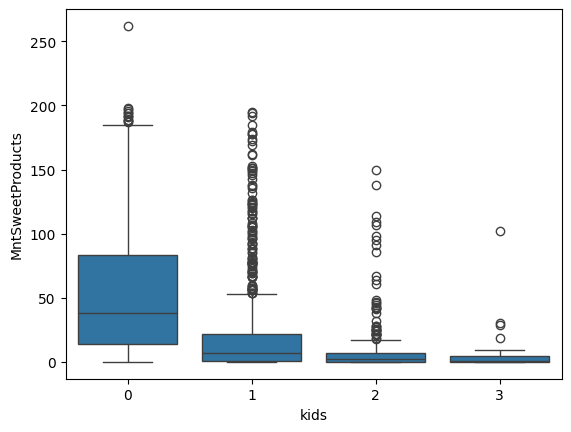

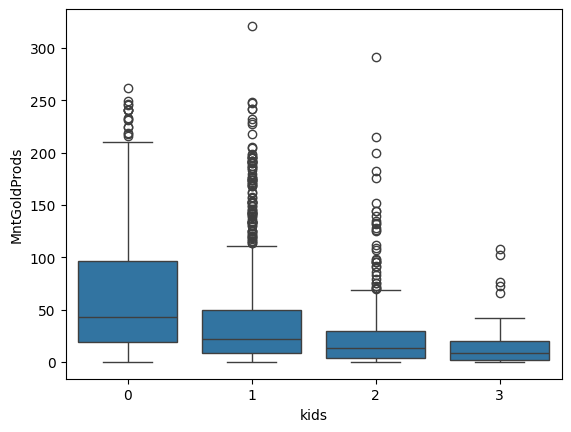

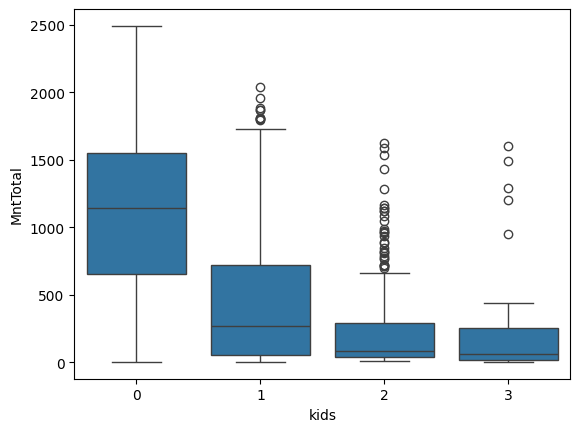

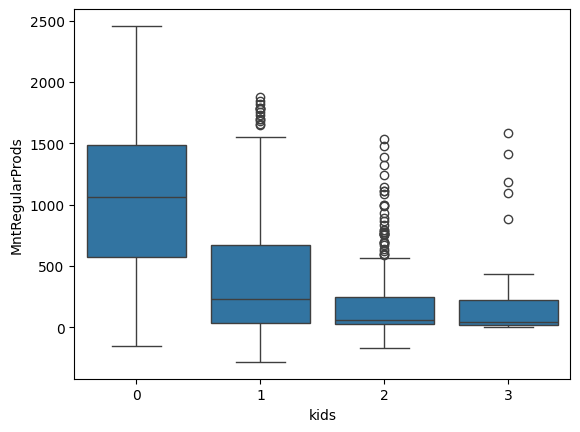

In [22]:
for col in df.columns:
    if 'Mnt' in col:
        sns.boxplot(x="kids", y=col, data=df)
        plt.show()

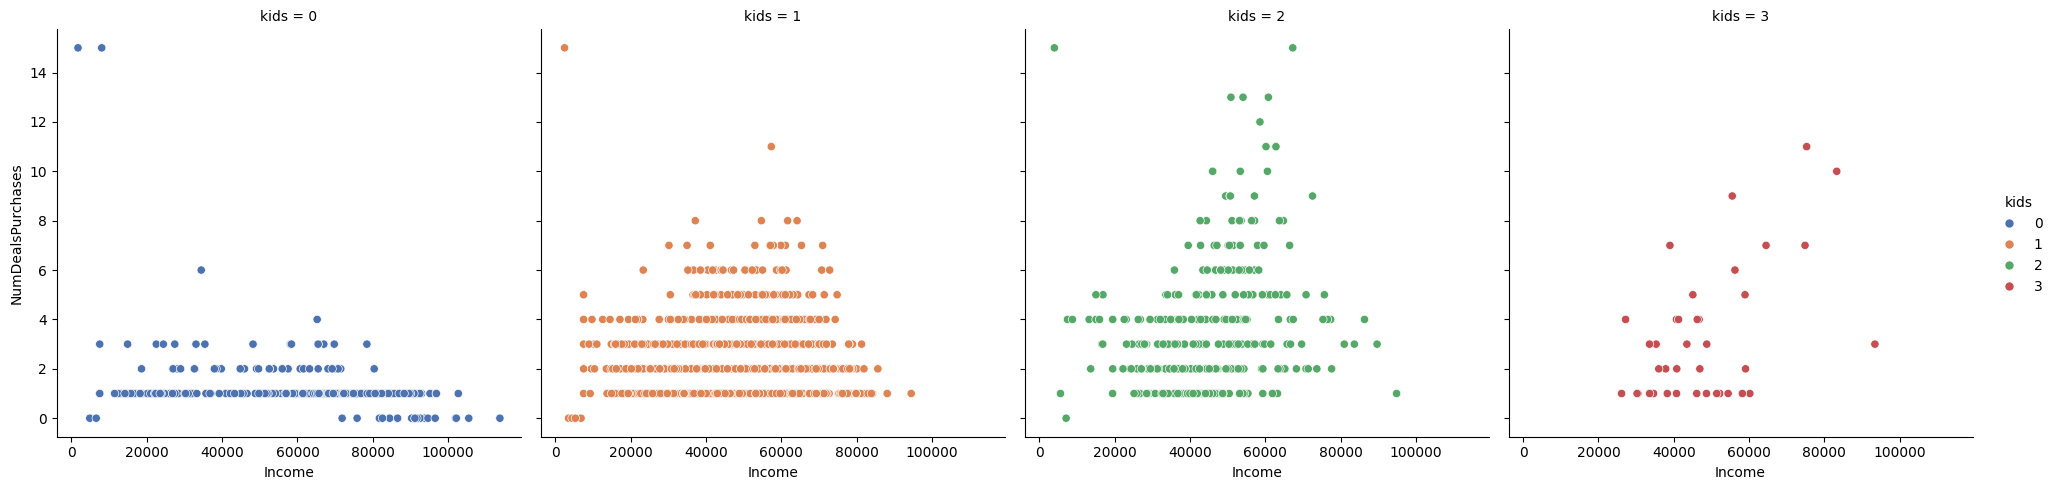

In [23]:
#let's see who purchases deals. Are people with more kids buying more deals, as they have less income?
sns.relplot(data=df, x="Income", y="NumDealsPurchases", col="kids", hue="kids",palette="deep")
plt.show()

It's very interesting to see that who has 0 kid tend to buy less deals altough they earn more, spend more. On the other hand, people with 1 or 2 kid, also earn less relatively, spend less but they look out for deals. People with 3 or more kid, earn less, spend vry less and hence they also buy less deals.

<Axes: >

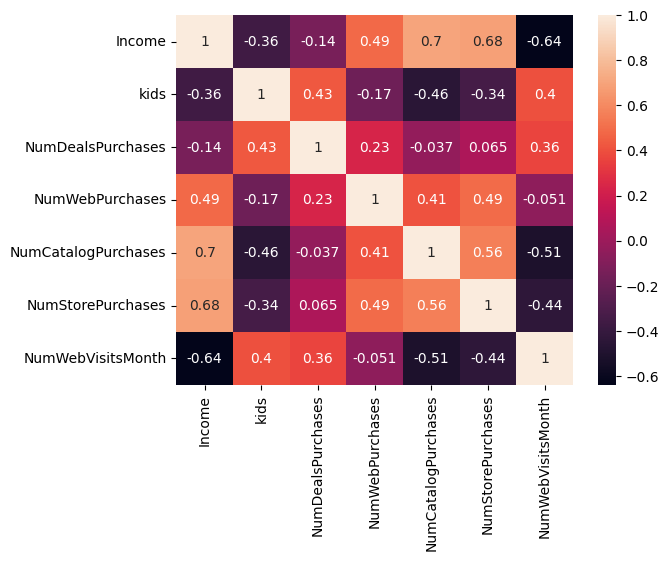

In [24]:
 #map the relation among different channels where purchases were made along with Income, Kids & number of deals bought.
df1=df[["Income","kids","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]]
sns.heatmap(df1.corr(), annot=True)

If cofficient, for any two elements, in heat map is closer to 1 then they are strongly related. Cofficient for one element against itself will always be 1.

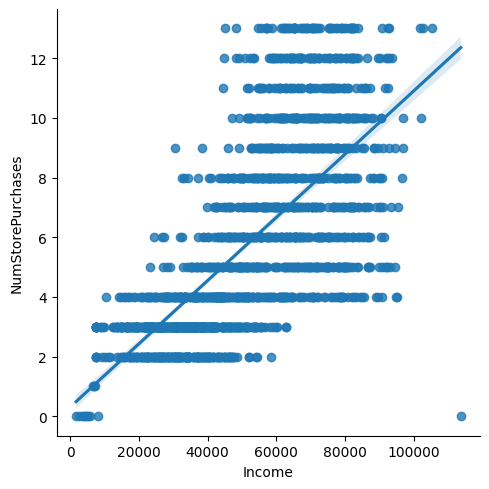

In [25]:
sns.lmplot(data=df, x="Income", y="NumStorePurchases")
plt.show()

Graph shows, that they are postively corelated. I.e. People with higher income tend to make more store purchases

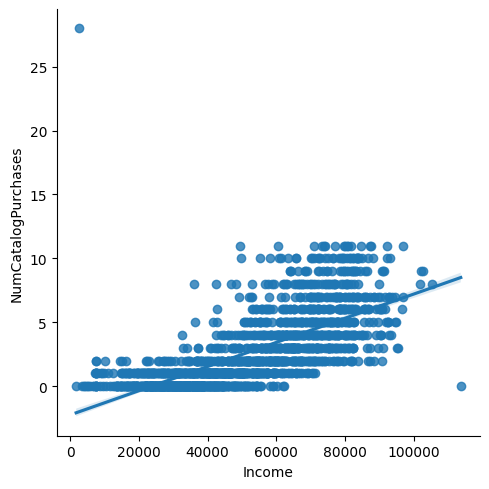

In [26]:
sns.lmplot(data=df, x="Income", y="NumCatalogPurchases")
plt.show()

People with higher income also make more catalogue purchases

Next, let's analyze accepted campaign & response data.

For that, we plot % of each campaign accepted and see which campaign better performed.Along with it, we also see how many people responded on last campaign.

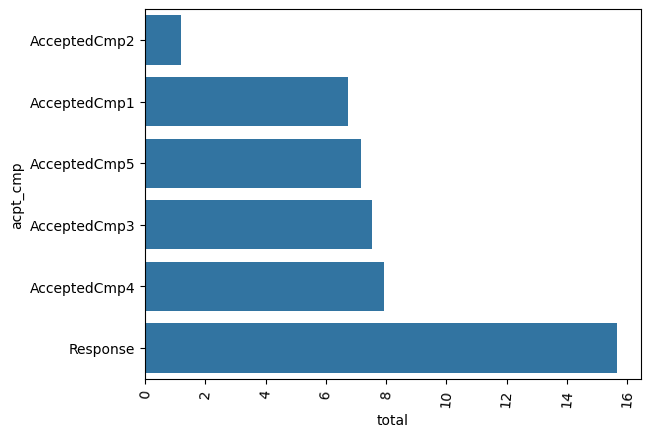

In [27]:
##### First, we calculate the % of each campaign accepted and then we plot them in bar graph.
success=((df[["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2", "Response"]].sum(axis=0)/ df[["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response"]].count(axis=0))*100).round(2).reset_index(name="total").rename(columns={'index':'acpt_cmp'}).sort_values(by="total")
sns.barplot(x="total", y="acpt_cmp", data=success)
plt.xticks(rotation=85)
plt.show()

 campaign 4 was accepted most however latest campaign i.e. campaign 5 was responded 15% of time.

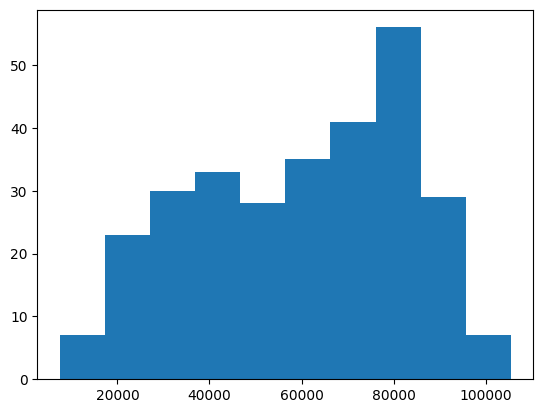

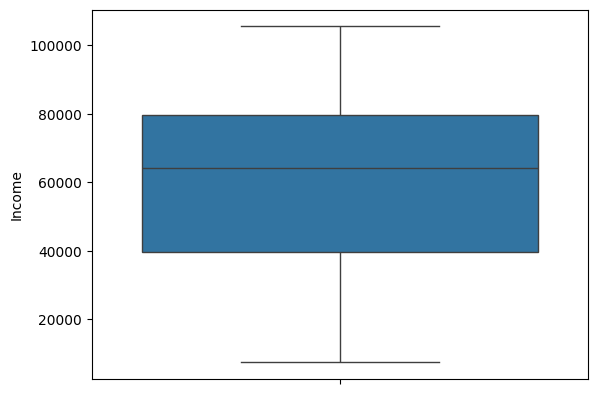

In [28]:
plt.hist(df[df["Response"]==1]["Income"])
plt.show()
sns.boxplot(y=df[df["Response"]==1]["Income"])
plt.show()

Histogram is right skewed that shows people who responded, were earning higher salaries. Box plot shows that 50% people were earning higher than 60K.

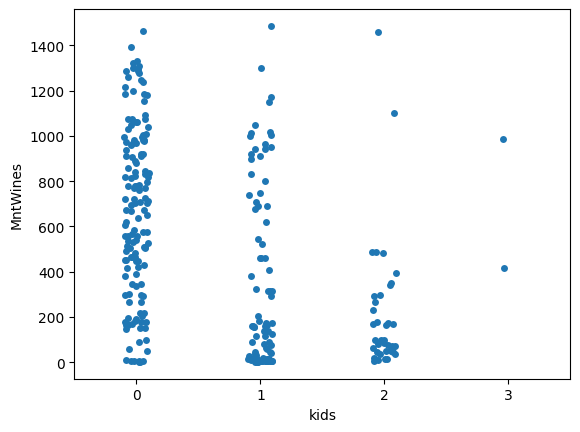

In [29]:
#let's check how much they have spent on wines and if having kids change anything.
sns.stripplot(y=df[df["Response"]==1]["MntWines"], x=df[df["Response"]==1]["kids"])
plt.show()

(array([ 35., 139., 174., 353., 317., 245., 234., 204., 121.,  21.]),
 array([24. , 29.6, 35.2, 40.8, 46.4, 52. , 57.6, 63.2, 68.8, 74.4, 80. ]),
 <BarContainer object of 10 artists>)

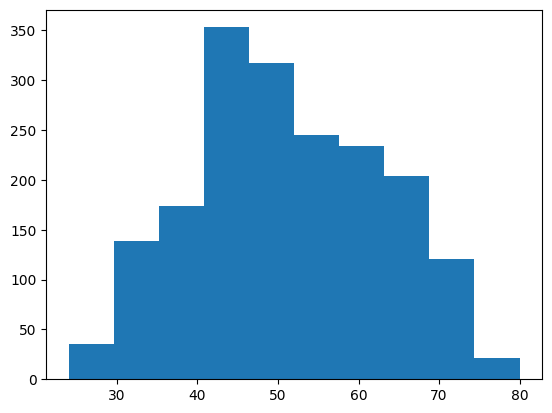

In [30]:
#we will check what age group people our dataset contains. For age distribution, will make Histogram.
plt.hist(data=df, x="Age")